# Shamir Secret Sharing
### Python version

@author: Ofer Rivlin<br>
@mail: ofer.rivlin@intel.com

#### Resources
https://en.wikipedia.org/wiki/Shamir%27s_secret_sharing<br />
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html<br />

In [1]:
# Import required libraries
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8-poster')

Shamir’s Secret Sharing scheme is a Threshold cryptographic algorithm which untrusted networks can use to distribute private information (also known as “secrets”) securely. 

A secret can be spliced into an arbitrary number of shares.<br />
A share by itself, doesn't tell anything about the secret and is useless. To reconstruct the secret, the minimum threshold number of shares must be met. Anything less, and the secret cannot be reconstructed.<br />

Shamir’s Secret Sharing algorithm is flexible. Secret owners can add, edit, or remove shares at any point without having to change the original secret.<br />
This protects your data from malicious attackers with limitless computational power.

## Mathematical principle
Shamir's secret sharing is a Threshold scheme based on **polynomial interpolation over finite fields**. <br />

k points on the polynomial uniquely determines a polynomial of degree less than or equal to k-1.<br />
For instance, 2 points are sufficient to define a line (linear),   
3 points are sufficient to define a parabola (degree 2),     
4 points to define a cubic curve (degree 3) and so forth. 

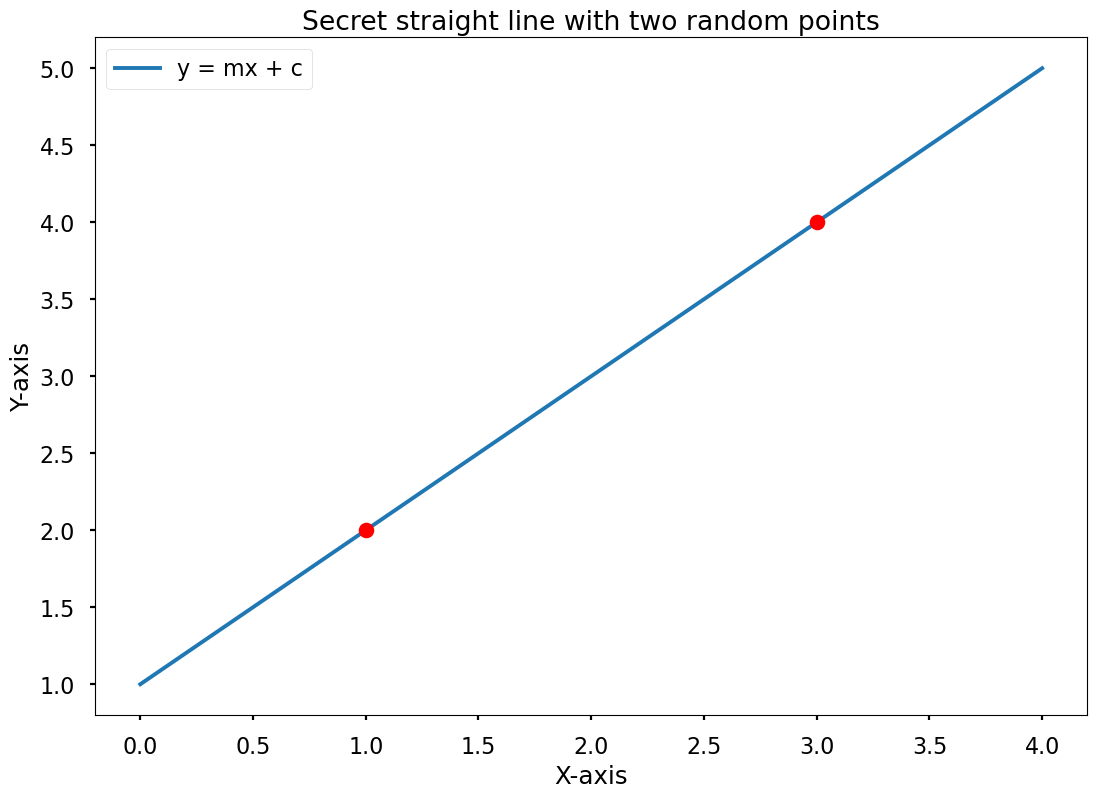

In [3]:
# Define coordinates of two points
x_coords = np.array([1, 3])
y_coords = np.array([2, 4])

# Calculate coefficients for y = mx + c
m = (y_coords[1] - y_coords[0]) / (x_coords[1] - x_coords[0])
c = y_coords[0] - m * x_coords[0]

# Define a function for the line
def line(x):
    return m * x + c

# Create an array of x values from 0 to 4
x = np.linspace(0, 4, 100)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the line
ax.plot(x, line(x), label='y = mx + c')

# Plot the points
ax.plot(x_coords, y_coords, 'ro')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Secret straight line with two random points')

# Show the legend
plt.legend()

# Display the plot
plt.show()


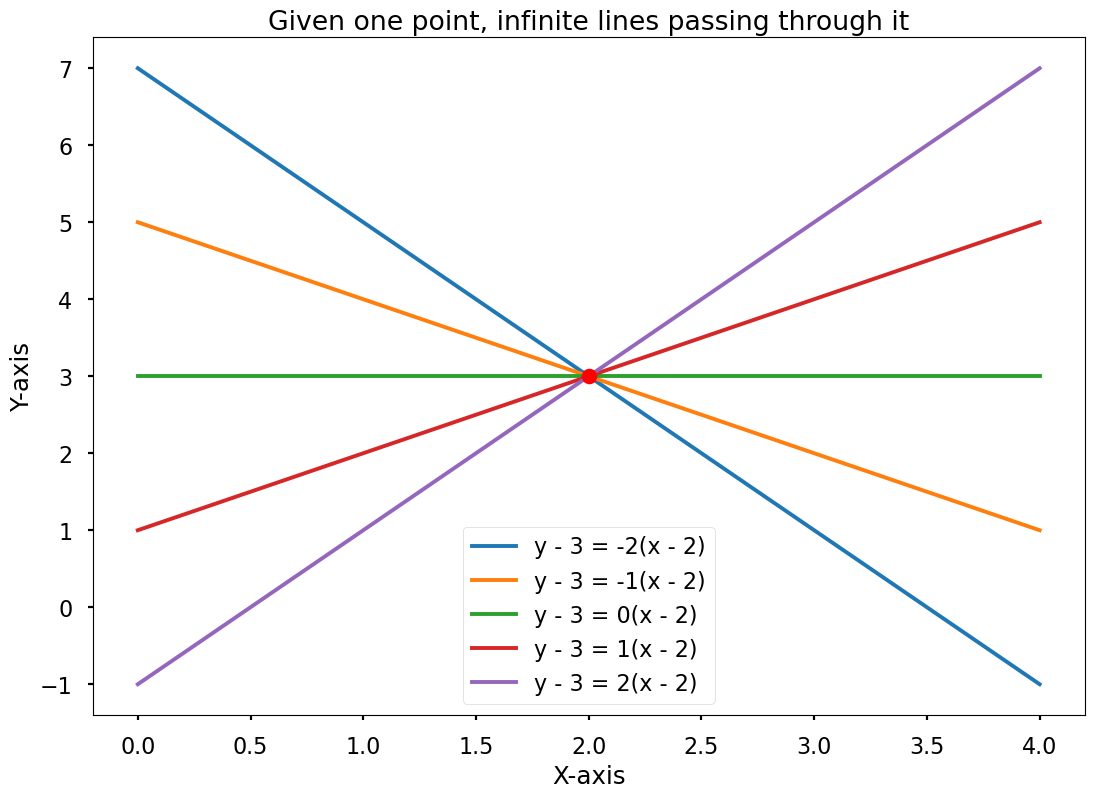

In [4]:
# Define coordinates of the point
x_point = 2
y_point = 3

# Define slopes for the lines
slopes = [-2, -1, 0, 1, 2]

# Define a function for the lines
def lines(x, m):
    return m * (x - x_point) + y_point

# Create an array of x values from 0 to 4
x = np.linspace(0, 4, 100)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the lines
for m in slopes:
    ax.plot(x, lines(x, m), label=f'y - {y_point} = {m}(x - {x_point})')

# Plot the point
ax.plot(x_point, y_point, 'ro')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Given one point, infinite lines passing through it')

# Show the legend
plt.legend()

# Display the plot
plt.show()

Basic overview:  
   
**Polynomial Generation:**
To share a secret, first, a random polynomial of degree k-1 is generated.      
The **constant term** of the polynomial is set as the **secret** that needs to be shared.    
The **coefficients of the polynomial are chosen randomly.**  
   
**Share Generation:** The polynomial is then evaluated at different points (except for zero) to generate 'n' shares. Each share is a point on the polynomial, i.e., a pair (x, f(x)).   
  
**Secret Reconstruction:** 
To reconstruct the secret, you need at least 'k' shares. 
These shares are used to **interpolate the polynomial using methods like Lagrange Interpolation.** 
**The secret (the constant term of the polynomial) is then found by evaluating the interpolated polynomial at x=0.**  
   
**The reason why it's secure is that with fewer than 'k' shares, the polynomial (and therefore the secret) can't be determined - there are simply too many possibilities.**    
But with 'k' or more shares, the polynomial (and therefore the secret) can be determined exactly.    
     
This is all done in a finite field to ensure that the operations of addition, subtraction, and multiplication always have inverses, and therefore the steps can always be reversed to recover the secret.  
   
Note: The secret must be smaller than the order of the finite field to ensure that it can't be accidentally split across the field boundary.t x=0.

## Example

Lets implement the example from Wikipedia:<br />
https://en.wikipedia.org/wiki/Shamir%27s_secret_sharing

The following example illustrates the basic idea. <br />
Note, however, that **calculations in the example are done using integer arithmetic rather than using finite field arithmetic** to make the idea easier to understand.  <br />
Therefore, the example below does not provide perfect secrecy and is not a proper example of Shamir's scheme.

**The secret to be shared is 1234 (S = 1234)** <br />
Split the secret into **6 shares (n = 6)**,  <br />
where any subset of **3 shares ( k = 3 )** is sufficient to reconstruct the secret.  <br />
**k − 1 = 2 numbers that are taken at random.**  <br />
Let them be 166 and 94. <br />

This yields coefficients: <br />
$a_0 = 1234 , a_1 = 166 , a_2 = 94$, <br />
where $a_0$ is the secret. <br />
The polynomial to produce secret shares (points) is therefore: <br />
$f(x) = 1234 + 166x + 94x^2$


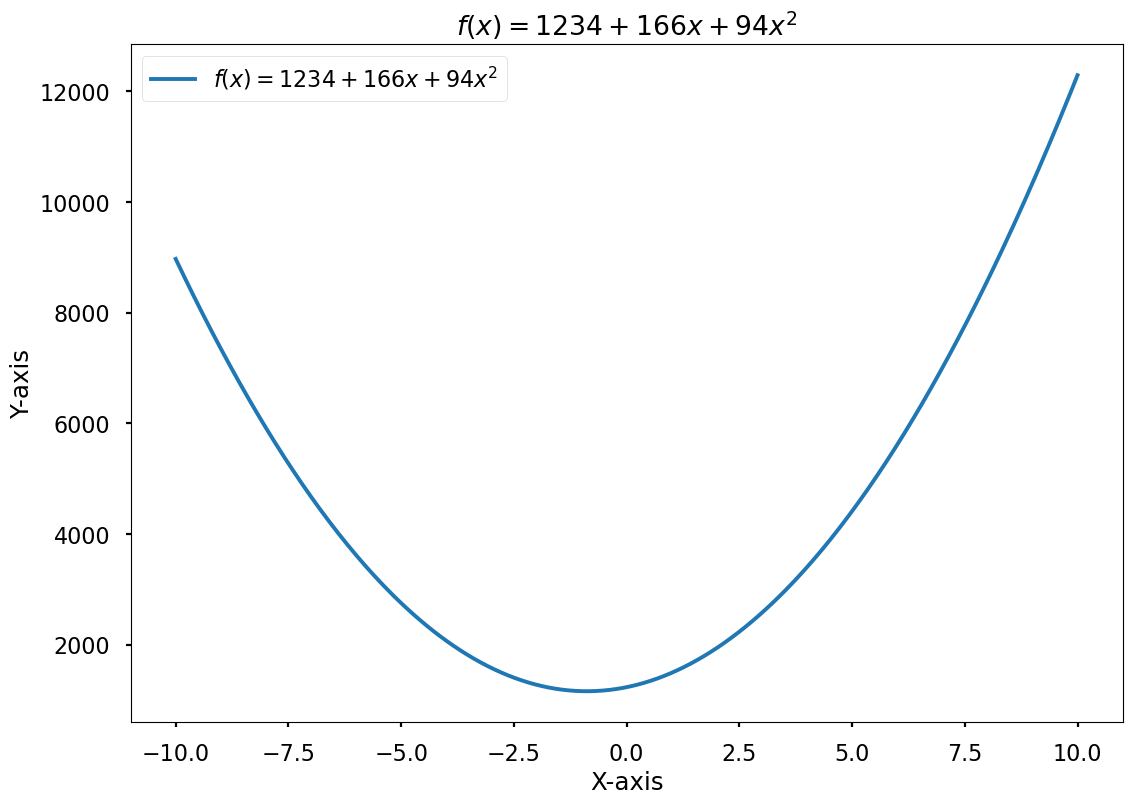

In [4]:
# Define the polynomial function
def f(x):
    return 1234 + 166 * x + 94 * x ** 2

# Create an array of x values from -10 to 10
x = np.linspace(-10, 10, 400)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the polynomial
ax.plot(x, f(x), label="$f(x) = 1234 + 166x + 94x^2$")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("$f(x) = 1234 + 166x + 94x^2$")

# Show the legend
plt.legend()

# Display the plot
plt.show()

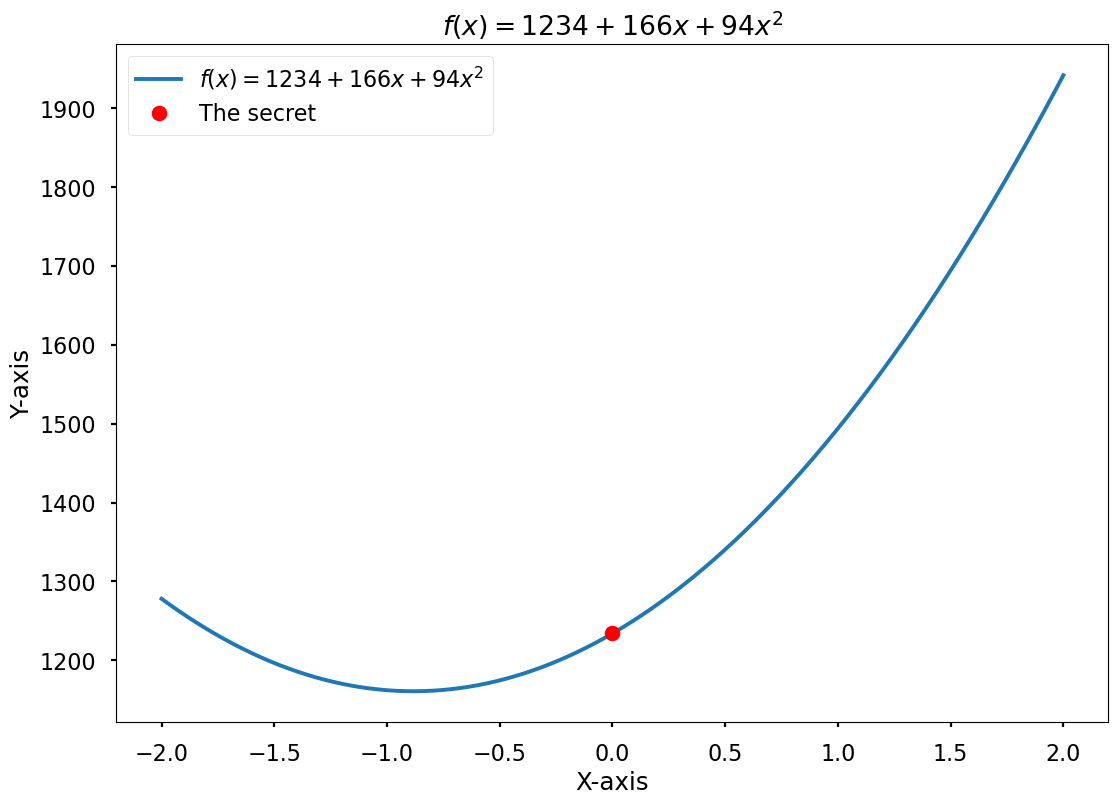

In [5]:
# Define the polynomial function
def f(x):
    return 1234 + 166 * x + 94 * x ** 2

# Point at f(0)
point = (0, f(0))

# Create an array of x values from -2 to 2
x = np.linspace(-2, 2, 400)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the polynomial
ax.plot(x, f(x), label="$f(x) = 1234 + 166x + 94x^2$")

# Plot the point
ax.plot(point[0], point[1], 'ro', label="The secret")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("$f(x) = 1234 + 166x + 94x^2$")

# Show the legend
plt.legend()

# Display the plot
plt.show()

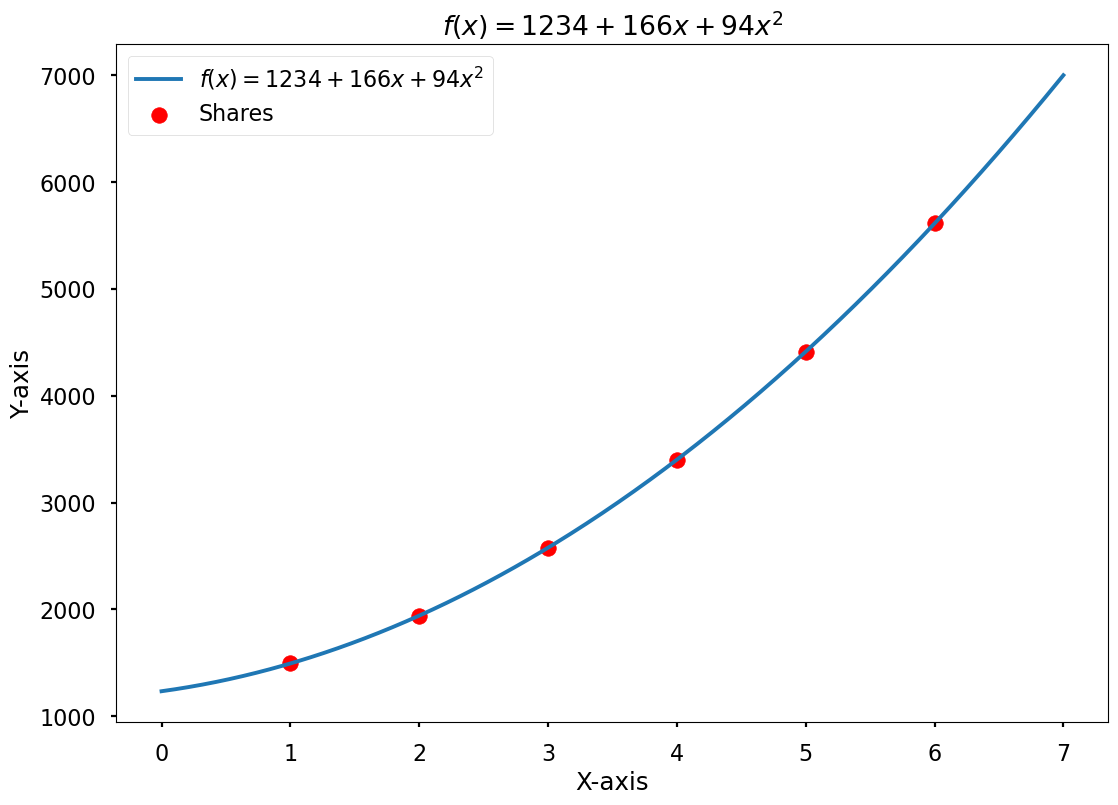

In [6]:
# Add the following 6 shares: [(1,1494),(2,1942),(3,2578),(4,3402),(5,4414),(6,5614)]

# Define the polynomial function
def f(x):
    return 1234 + 166 * x + 94 * x ** 2

# Define the shares
shares = [(1,1494),(2,1942),(3,2578),(4,3402),(5,4414),(6,5614)]

# Create an array of x values from 0 to 7
x = np.linspace(0, 7, 400)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the polynomial
ax.plot(x, f(x), label="$f(x) = 1234 + 166x + 94x^2$")

# Plot the shares
share_xs = []
share_ys = []
for point in shares:
    share_xs.append(point[0])
    share_ys.append(point[1])

plt.scatter(share_xs, share_ys, label='Shares', c='r')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("$f(x) = 1234 + 166x + 94x^2$")

# Show the legend
plt.legend()

# Display the plot
plt.show()

Let's choose six shares randomly chosen from the polynomial: <br />
shares = [ (1,1494) , (2,1942) , (3,2578) , (4,3402) , (5,4414) , (6,5614) ]

Each participant in the scheme receives a different point (share): ( x, f(x) ).<br />
Points are symboled as $D_i$. <br />
Because we use $D_{x−1}$ instaed of $D_{x}$, the points start from ( 1, f(1) ) and not ( 0, f(0) ).<br />
This is necessary because **f(0) is the secret.** 

### Reconstruction

In order to reconstruct the secret, any 3 shares are sufficient<br />
For the threshold of 3 shares, let's use the 3 following  points:<br />

$(x_{0},y_{0})=(2,1942), (x_{1},y_{1})=(4,3402),(x_{2},y_{2})=(5,4414)$

These are the shares (points) we have:      
 - x=2, y=1942   
 - x=4, y=3402   
 - x=5, y=4414      

In [18]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

In [19]:
xs = [2, 4, 5]
ys = [1942, 3402, 4414]

In [23]:
f = lagrange(xs, ys)  #Lagrange Interpolation

In [24]:
Polynomial(f.coef[::-1])#.coef

Polynomial([1234.,  166.,   94.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [25]:
Polynomial(f.coef[::-1]).coef[0]

np.float64(1234.0)

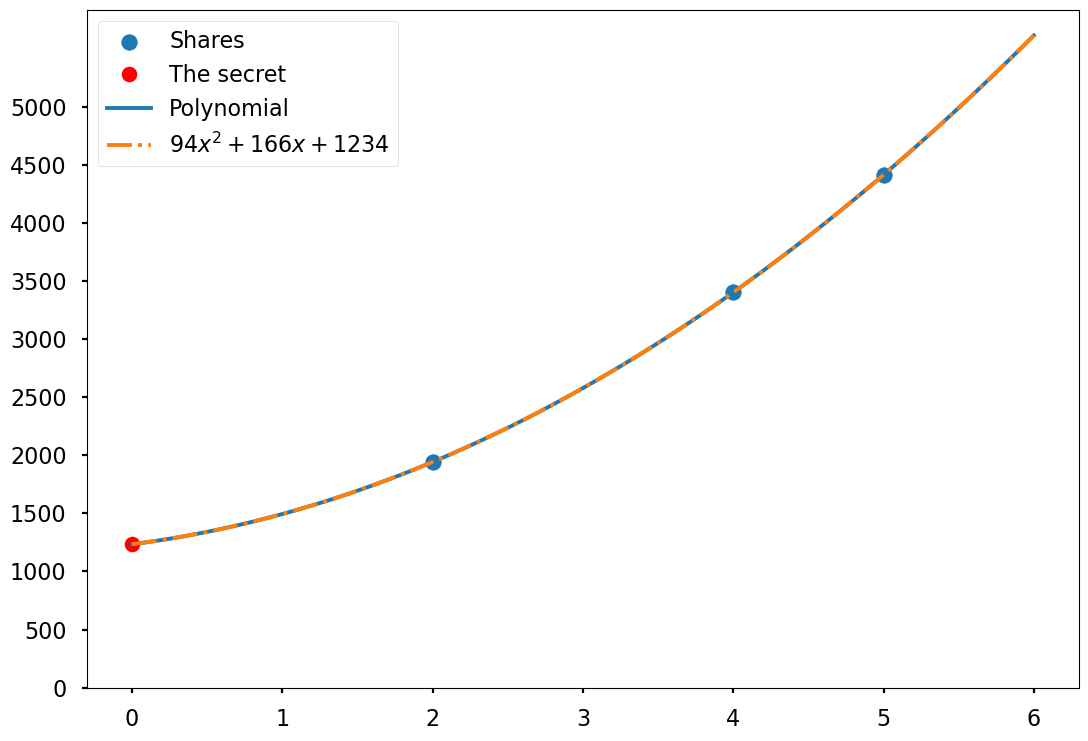

In [26]:
# Generates xs from 0 up to 6, with steps of 0.1
# this will generate the points (x,f(x) that will create the line of the function
x_new = np.arange(0, 6.1, 0.1)

plt.scatter(xs, ys, label='Shares')
# Plot the secret point
plt.plot(0, Polynomial(f.coef[::-1]).coef[0], 'ro', label="The secret")

plt.plot(x_new, Polynomial(f.coef[::-1])(x_new), label='Polynomial')
# 1234 + 166x + 94x^2
plt.plot(x_new, 94*x_new**2 + 166*x_new + 1234,
         label=r"$94 x^2 + 166 x + 1234$", linestyle='-.')
plt.yticks(np.arange(0, 5001, 500))
plt.legend()
plt.show()

These are the shares (points) we have:      
 - x=2, y=1942   
 - x=4, y=3402   
 - x=5, y=4414  